## 5.4 Составные квадратурные формулы
Написать программу для вычисления интеграла по составной квадратурной формуле.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [2]:
def calc_weights():
    d = np.zeros(5)
    tgrid = np.array([-1, -3/4, 0, 3/4, 1])
    d[0] = 1 / 35    # t_0 = -1
    d[1] = 512 / 945 # t_1 = -3/4
    d[2] = 116 / 135 # t_2 = 0
    d[3] = 512 / 945 # t_3 = 3/4
    d[4] = 1 / 35    # t_4 = 1
    return tgrid, d

In [3]:
def make_new_grid(x):
    temp = list()
    for i in range(x.shape[0] - 1):
        temp.append(x[i])
        temp.append((x[i] + x[i + 1]) / 2)
    temp.append(x[-1])
    return np.array(temp)

def integral(f, a, b, tol):
    tgrid, d = calc_weights()
    x = (a + b) / 2 + (b - a) / 2 * tgrid
    S_1 = (b - a) / 2 * np.sum(f(x) * d)
    S_2 = 0
    xgrid = np.array([a, b])
    err = np.inf
    max_iter = 50
    while (err > tol and max_iter > 0):
        max_iter -= 1
        xgrid = make_new_grid(xgrid)
        # print(xgrid)
        for i in range(xgrid.shape[0] - 1):
            x = (xgrid[i] + xgrid[i + 1]) / 2 + (xgrid[i + 1] - xgrid[i]) / 2 * tgrid # np.linspace(-1, 1, 5)
            S_2 += (xgrid[i + 1] - xgrid[i]) / 2 * np.dot(f(x), d)
        err = np.abs(S_2 - S_1) / (2**5 - 1)
        S_1 = S_2
        S_2 = 0
    return S_1, xgrid.shape[0] - 1

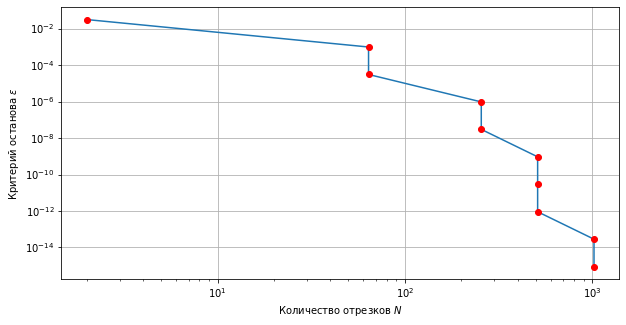

In [13]:
f = lambda x : 1 / (25*x**2 + 1)
a = -5
b = 10
tol_arr = np.array([2**(-i) for i in range(5, 51, 5)])
N = list()
for tol in tol_arr:
    _, n = integral(f, a, b, tol)
    N.append(n)
N = np.array(N)
plt.figure(figsize=(10, 5))
plt.loglog(N, tol_arr)
plt.loglog(N, tol_arr, 'ro')
plt.xlabel("Количество отрезков $N$")
plt.ylabel("Критерий останова $\\varepsilon$")
plt.grid()